In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [3]:
customer = pd.read_csv(r"C:\Users\ADMIN\Downloads\Python Foundation Case Study 1 - Retail Case Study\Customer.csv")

In [4]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [5]:
transactions = pd.read_csv(r"C:\Users\ADMIN\Downloads\Python Foundation Case Study 1 - Retail Case Study\Transactions.csv")
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [6]:
product = pd.read_csv(r"C:\Users\ADMIN\Downloads\Python Foundation Case Study 1 - Retail Case Study\prod_cat_info.csv")
product.head(5)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [7]:
customers = pd.merge(left = customer, right = transactions, how = 'inner',left_on = 'customer_Id',right_on='cust_id')
customers.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store


In [8]:
Customer_Final = pd.merge( left= customers, right =product , how ='inner',left_on =['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'])
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction


### 2. Prepare a summary report for the merged data set.
    a. Get the column names and their corresponding data types

In [9]:
Customer_Final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [10]:
Customer_Final["DOB"] = pd.to_datetime(Customer_Final["DOB"], format="%d-%m-%Y")


In [11]:
Customer_Final["tran_date"] = pd.to_datetime(Customer_Final["tran_date"] )

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6224\2524012348.py:1: UserWarning: Parsing '13-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final["tran_date"] = pd.to_datetime(Customer_Final["tran_date"] )
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6224\2524012348.py:1: UserWarning: Parsing '25-03-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final["tran_date"] = pd.to_datetime(Customer_Final["tran_date"] )
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6224\2524012348.py:1: UserWarning: Parsing '23-05-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final["tran_date"] = pd.to_datetime(Customer_Final["tran_date"] )
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6224\2524012348.py:1: UserWarning: Parsing '23-05-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=Tr

In [12]:
Customer_Final.dtypes

customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object

##### b. Top/Bottom 10 observations

In [13]:
# top 10 observations
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
5,274630,1970-02-01,M,4.0,78357345891,274630,2012-11-04,7,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,1970-02-01,M,4.0,23916816961,273541,2013-09-02,7,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction
7,269008,1970-02-13,F,6.0,35560569829,269008,2013-09-03,7,5,1,1441,151.305,1592.305,e-Shop,Books,7,Fiction
8,269008,1970-02-13,F,6.0,94033312891,269008,2012-04-26,7,5,5,746,391.650,4121.650,MBR,Books,7,Fiction
9,267199,1970-02-14,NaN,2.0,56749259881,267199,2012-11-01,7,5,4,1049,440.580,4636.580,MBR,Books,7,Fiction


In [14]:
#bottom 10 observations
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,268914,1992-11-15,F,3.0,1407823655,268914,2011-10-06,10,5,1,1252,131.460,1383.460,MBR,Books,10,Non-Fiction
23044,269519,1992-11-17,M,9.0,29719500605,269519,2013-12-24,10,5,4,1036,435.120,4579.120,TeleShop,Books,10,Non-Fiction
23045,273524,1992-11-25,F,1.0,25762805863,273524,2012-11-19,10,5,1,1401,147.105,1548.105,Flagship store,Books,10,Non-Fiction
23046,272141,1992-12-02,F,10.0,71337087467,272141,2012-07-22,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,10,Non-Fiction
23047,272141,1992-12-02,F,10.0,71337087467,272141,2012-07-16,10,5,3,1422,447.930,4713.930,e-Shop,Books,10,Non-Fiction
23048,267812,1992-12-04,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,1992-12-09,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction
23052,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-26,10,5,4,1408,591.360,6223.360,e-Shop,Books,10,Non-Fiction


  ##### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [15]:
Customer_Final.describe()

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
count,23053.000000,23045.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271021.746497,5.482534,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,6.149091
std,2431.692059,2.863499,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,3.726372
min,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,268935.000000,3.000000,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,270980.000000,5.000000,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000
75%,273114.000000,8.000000,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,10.000000
max,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000


##### d. Frequency tables for all the categorical variables

In [16]:
Customer_Final.loc[:,Customer_Final.dtypes=='object'].describe()

,Gender,Store_type,prod_cat,prod_subcat
count,23044,23053,23053,23053
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11811,9311,6069,3048


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

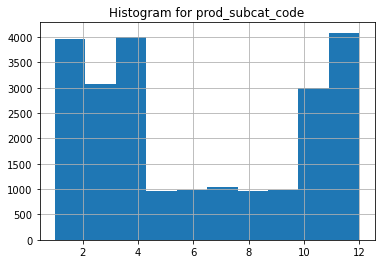

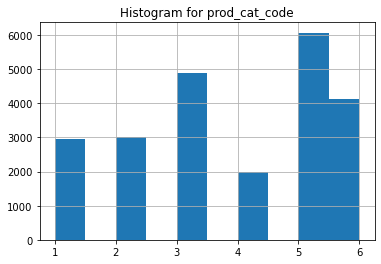

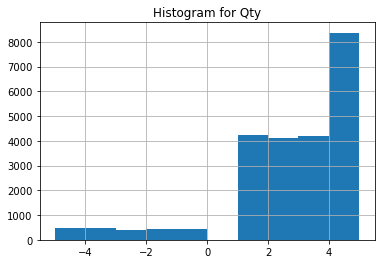

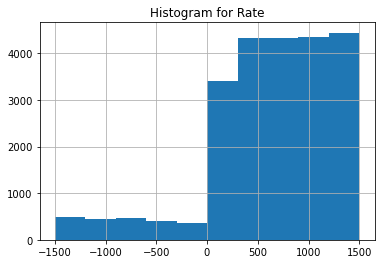

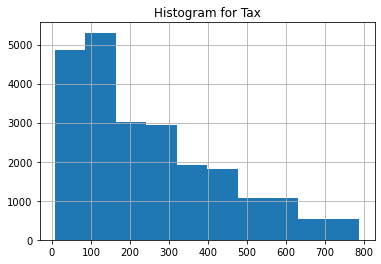

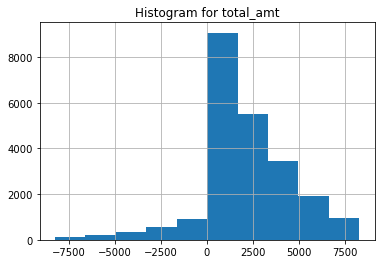

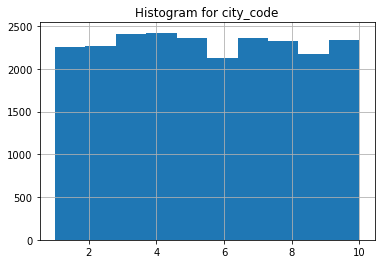

prod_subcat_code    None
prod_cat_code       None
Qty                 None
Rate                None
Tax                 None
total_amt           None
city_code           None
dtype: object

In [17]:
Continuous_variables = Customer_Final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt','city_code']]

def histo(x):
    plt.title('Histogram for '+ x.name)
    plt.grid(True)
    plt.hist(x)
    plt.show()
    
Continuous_variables.apply(histo)



In [18]:
y = Customer_Final.select_dtypes('object')
y

,Gender,Store_type,prod_cat,prod_subcat
0,M,TeleShop,Books,Fiction
1,M,e-Shop,Books,Fiction
2,F,Flagship store,Books,Fiction
3,F,e-Shop,Books,Fiction
4,F,e-Shop,Books,Fiction
...,...,...,...,...
23048,F,TeleShop,Books,Non-Fiction
23049,F,Flagship store,Books,Non-Fiction
23050,F,e-Shop,Books,Non-Fiction
23051,F,e-Shop,Books,Non-Fiction


<AxesSubplot:xlabel='Gender', ylabel='count'>

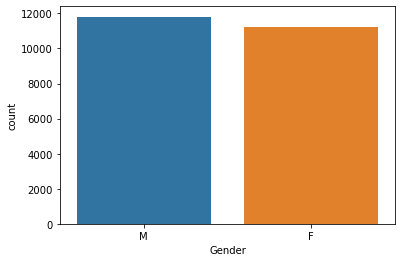

In [19]:
sns.countplot(x= 'Gender',data=y)

<AxesSubplot:xlabel='Store_type', ylabel='count'>

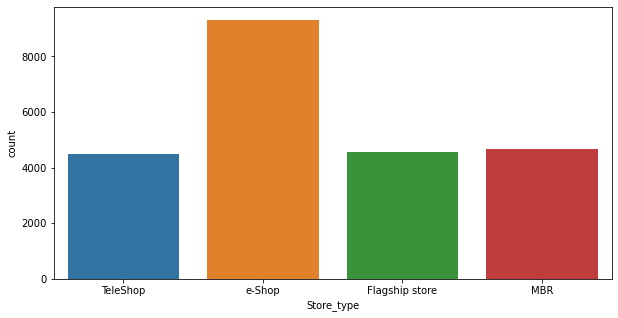

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='Store_type',data = y)

<AxesSubplot:xlabel='prod_cat', ylabel='count'>

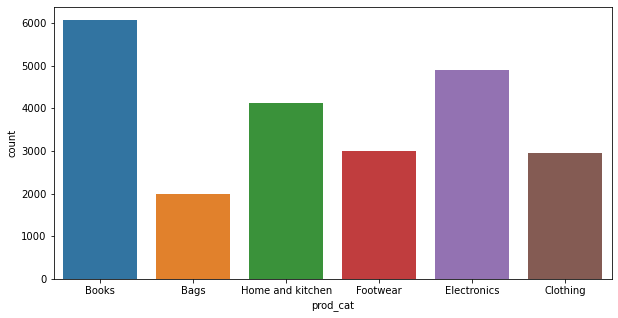

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='prod_cat',data = y)


<AxesSubplot:xlabel='prod_subcat', ylabel='count'>

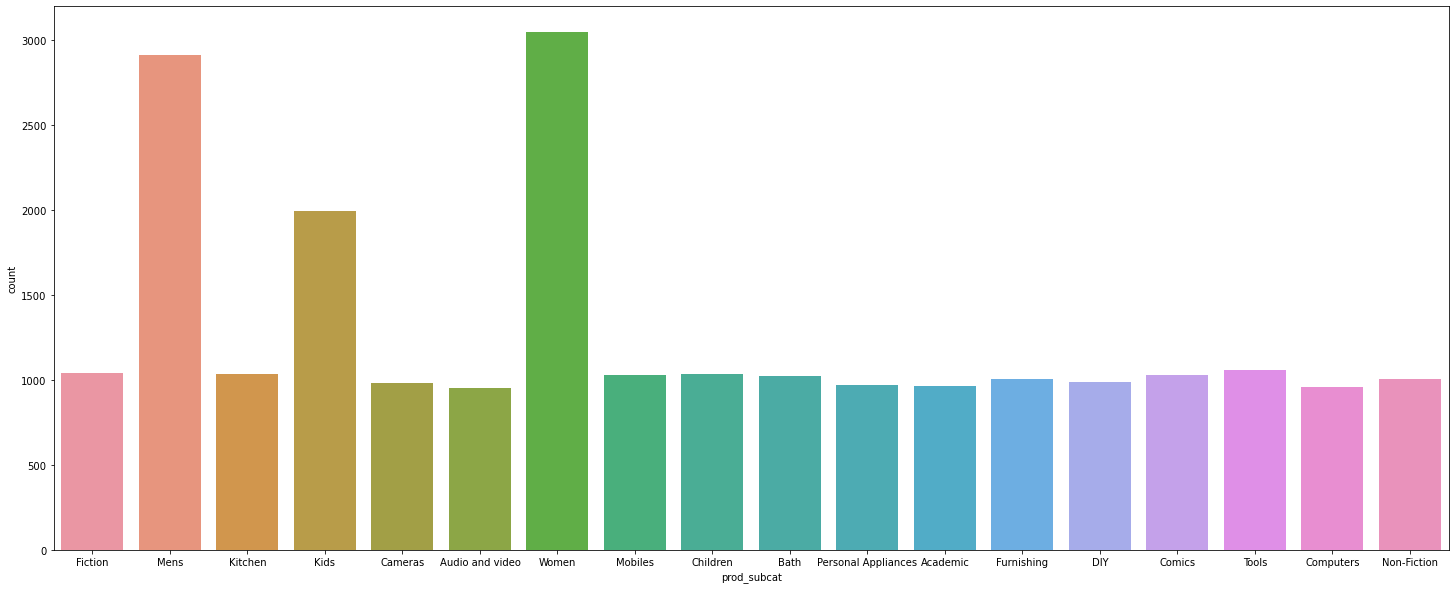

In [22]:
plt.figure(figsize=(25,10))
sns.countplot(x='prod_subcat',data = y)



### 4. Calculate the following information using the merged dataset :
    a. Time period of the available transaction data
    b. Count of transactions where the total amount of transaction was negative

In [23]:
## time period

In [24]:
Y = Customer_Final.tran_date.max()
Y

Timestamp('2014-12-02 00:00:00')

In [25]:
X = Customer_Final.tran_date.min()
X

Timestamp('2011-01-02 00:00:00')

In [26]:
print("Time period of the transaction data is from "+ pd.Timestamp.strftime(X,format="%d-%m-%Y") + " to "+ pd.Timestamp.strftime(Y,format="%d-%m-%Y"))

Time period of the transaction data is from 02-01-2011 to 02-12-2014


In [27]:
## negative Transactions

In [28]:
Negative_transactions = Customer_Final.loc[Customer_Final['total_amt'] < 0, "transaction_id"].count()
print('Count of transactions where the total amount of transaction was negative is',Negative_transactions)

Count of transactions where the total amount of transaction was negative is 2177


### 5. Analyze which product categories are more popular among females vs male customers.

In [29]:
Customer_Final.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction


In [34]:
Customer_Final.groupby(['Gender','prod_cat'])[['Qty']].sum()

Qty
Gender prod_cat              
F      Bags              2362
       Books             7070
       Clothing          3425
       Electronics       5832
       Footwear          3716
       Home and kitchen  4895
M      Bags              2346
       Books             7587
       Clothing          3748
       Electronics       6476
       Footwear          3555
       Home and kitchen  5041

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [31]:
max_cust = Customer_Final.groupby(['city_code'])['transaction_id'].count().sort_values(ascending=False)
max_cust.head(1)

city_code
4.0    2422
Name: transaction_id, dtype: int64

In [29]:
max_cust[4.0]/max_cust.sum()*100

10.509871989585594

### 7. Which store type sells the maximum products by value and by quantity?

In [166]:
Customer_Final.groupby('Store_type')[['total_amt','Qty']].sum().sort_values( by = ['total_amt','Qty'] ,ascending =  False).head(1)

,total_amt,Qty
Store_type,,
e-Shop,19824816.05,22763


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [31]:
store = Customer_Final.pivot_table(values = 'total_amt',index= 'prod_cat',columns=('Store_type'),aggfunc=('sum'))
store

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835,848678.675,789181.055,1616300.075
Books,2488205.850,2496039.195,2545005.060,5293443.935
Clothing,1194423.230,1287686.335,1241834.360,2527193.565
Electronics,2215136.040,2107514.565,1973338.835,4426474.195
Footwear,1234806.560,1112163.715,1235719.290,2637084.710
Home and kitchen,1712567.675,1822403.570,1579702.475,3324319.570


In [32]:
total = store.loc[["Clothing","Electronics"],"Flagship store"].sum()
total

3409559.27

In [33]:
print( 'the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is' ,total)

the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is 3409559.27



### 9 .What was the total amount earned from "Male" customers under the "Electronics" category?

In [35]:
total1 =Customer_Final.pivot_table(values = 'total_amt',index='prod_cat',columns='Gender',aggfunc='sum')
total1

Gender,F,M
prod_cat,,
Bags,2077985.650,2046722.990
Books,6164692.235,6645972.775
Clothing,3026750.805,3224079.495
Electronics,5019354.210,5703109.425
Footwear,3202552.990,3014672.050
Home and kitchen,4132177.335,4301075.480


In [36]:
total2= total1.loc['Electronics','M']
print('Total amount earned by male customers is',total2)

Total amount earned by male customers is 5703109.425


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have      any negative amounts?

In [93]:
customers  = pd.DataFrame(Customer_Final.groupby('customer_Id')['transaction_id'].count())
customers

,transaction_id
customer_Id,
266783,5
266784,3
266785,8
266788,4
266794,12
...,...
275257,5
275261,5
275262,2


In [74]:
customers.loc[customers['transaction_id']> 10, :]

,transaction_id
customer_Id,
266794,12
267014,11
267768,11
267913,11
268207,11
268408,11
268663,12
268819,13
268934,11


In [86]:
Positive_amt = Customer_Final.loc[Customer_Final['total_amt'] > 0 , :]

In [167]:
Positive_amt.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


In [88]:
positive_trans = pd.DataFrame(Positive_amt.groupby('customer_Id')['transaction_id'].count())
positive_trans

,transaction_id
customer_Id,
266783,4
266784,3
266785,7
266788,4
266794,11
...,...
275257,4
275261,3
275262,2


In [85]:
positive_trans.loc[positive_trans['transaction_id'] >10 ]

,transaction_id
customer_Id,
266794,11
270535,11
270803,11
272741,11
273014,11
274227,11


### 11. For all customers aged between 25 - 35, find out:
    a. What was the total amount spent for “Electronics” and “Books” product categories?
    b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [107]:
datenow = dt.datetime.now()
print(datenow)

2022-11-09 13:40:41.080583


In [112]:
Customer_Final['Age'] = (datenow - Customer_Final['DOB']).astype('<m8[Y]')
Customer_Final['Age']

0        52.0
1        52.0
2        52.0
3        52.0
4        52.0
         ... 
23048    29.0
23049    29.0
23050    29.0
23051    29.0
23052    29.0
Name: Age, Length: 23053, dtype: float64

In [134]:
Customer_Final['Age_Group'] = pd.cut(Customer_Final['Age'],bins=[24,36,45,56],labels =['25-35','35-45','45-55'])
Customer_Final['Age_Group']

0        45-55
1        45-55
2        45-55
3        45-55
4        45-55
         ...  
23048    25-35
23049    25-35
23050    25-35
23051    25-35
23052    25-35
Name: Age_Group, Length: 23053, dtype: category
Categories (3, object): ['25-35' < '35-45' < '45-55']

In [169]:
Customer_Final.head(3)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,Age,Age_Group
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction,52.0,45-55
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction,52.0,45-55
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction,52.0,45-55


In [135]:
age_groupwise_sales = Customer_Final.groupby(['Age_Group','prod_cat'])['total_amt'].sum()
age_groupwise_sales

Age_Group  prod_cat        
25-35      Bags                1252549.545
           Books               3807870.885
           Clothing            2142464.610
           Electronics         3420927.510
           Footwear            2011652.500
           Home and kitchen    2661252.165
35-45      Bags                1565607.095
           Books               5011672.250
           Clothing            2392496.275
           Electronics         4078268.805
           Footwear            2470192.140
           Home and kitchen    3323308.495
45-55      Bags                1306552.000
           Books               4003150.905
           Clothing            1716176.605
           Electronics         3223267.320
           Footwear            1737929.635
           Home and kitchen    2454432.630
Name: total_amt, dtype: float64

In [147]:
age_25_35 = age_groupwise_sales.loc['25-35',['Books','Electronics']]
age_25_35.sum()

7228798.395

In [151]:
age_25_35_cust = Customer_Final[Customer_Final['Age_Group'] == '25-35']
age_25_35_cust.head(3)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,Age,Age_Group
721,272425,1985-11-16,F,3.0,74237732420,272425,2011-10-31,7,5,2,1063,223.230,2349.230,e-Shop,Books,7,Fiction,36.0,25-35
722,267268,1985-12-21,M,8.0,53726738152,267268,2012-03-26,7,5,5,1494,784.350,8254.350,MBR,Books,7,Fiction,36.0,25-35
723,268025,1985-12-28,M,9.0,10837804347,268025,2013-12-22,7,5,5,227,119.175,1254.175,e-Shop,Books,7,Fiction,36.0,25-35


In [ ]:
#b.

In [170]:
total_25_35 = age_25_35_cust[(age_25_35_cust['tran_date'] >= '2014-01-01')& (age_25_35_cust['tran_date'] >= '2014-03-01')]
total_25_35.head(3)


,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,Age,Age_Group
804,274923,1987-09-08,M,8.0,97988621875,274923,2014-03-02,7,5,3,837,263.655,2774.655,e-Shop,Books,7,Fiction,35.0,25-35
921,272900,1989-10-22,M,6.0,41158801039,272900,2014-08-01,7,5,5,766,402.150,4232.150,TeleShop,Books,7,Fiction,33.0,25-35
951,267864,1990-11-17,M,3.0,18062786609,267864,2014-03-01,7,5,3,623,196.245,2065.245,MBR,Books,7,Fiction,31.0,25-35


In [171]:
total_25_35['total_amt'].sum()

278501.99